In [ ]:
#Install pystan (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge pystan
#!pip install pystan

In [ ]:
#Install fbprophet (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet

In [ ]:
#Upgrade plotly after installing fbprophet
#Code should be disabled after first run

#!pip install --upgrade plotly

In [2]:
#Import dependencies

import pandas as pd
import numpy as np

from fbprophet import Prophet

import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats

In [3]:
df = pd.read_csv('data/WMT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037027,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036887,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.036466,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.036466,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035905,870400


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12242.000000,12242.000000,12242.000000,12242.000000,12242.000000,1.224200e+04
mean,33.323517,33.640010,33.008329,33.329019,27.098417,7.527616e+06
std,34.336433,34.632807,34.052622,34.342539,31.485295,6.279231e+06
min,0.015625,0.015625,0.014404,0.015625,0.009031,0.000000e+00
25%,1.332031,1.352540,1.320313,1.335938,0.836820,3.835650e+06
50%,14.843750,14.937500,14.687500,14.875000,9.767956,6.278500e+06
75%,55.240002,55.933124,54.637500,55.250000,40.818147,9.515550e+06
max,153.600006,153.660004,151.660004,152.789993,152.233536,1.318336e+08


In [5]:
priceVolume = df[['Close','Volume']]
priceVolume.head()

,Close,Volume
0,0.064453,2508800
1,0.064209,972800
2,0.063477,1945600
3,0.063477,409600
4,0.062500,870400


In [ ]:
from sklearn.preprocessing import MinMaxScaler


C:\Users\mayla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

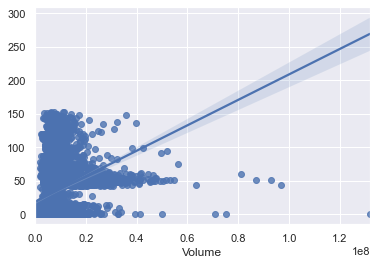

In [14]:
corr = scipy.stats.linregress(priceVolume)
corr.rvalue

sns.set_theme(style="darkgrid")
x = pd.to_numeric(priceVolume["Volume"]).astype(float)
y = np.array(priceVolume["Close"]).astype(float)
sns.regplot(x, y)

In [ ]:
# Select only the important features i.e. the date and price
data = df[["Date","Close"]] # select Date and Price

plt.figure(figsize=(15,5))
plt.plot(data['Date'], data['Close'])
plt.title('Price chart (Close) ')
plt.show()

In [ ]:
# Rename the features: These names are NEEDED for the model fitting
datePrice = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
1datePrice.head(5)

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(datePrice)
datePrice.tail()

In [ ]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

In [ ]:
predictions = model.predict(future_df)
predictions.tail()

In [ ]:
model.plot(predictions)

In [ ]:
model.plot_components(predictions)

In [ ]:
from fbprophet.diagnostics import cross_validation
priceCV = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')
priceCV.head()

In [ ]:
priceCV

In [ ]:
from fbprophet.diagnostics import performance_metrics
priceMetrics = performance_metrics(priceCV)
priceMetrics.tail()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(priceCV, metric = 'mape')

In [ ]:
data2 = df[["Date","Volume"]] # select Date and Volume

# Rename the features: These names are NEEDED for the model fitting
dateVolume = data2.rename(columns = {"Date":"ds","Volume":"y"}) #renaming the columns of the dataset
dateVolume.head(5)

In [ ]:
model2 = Prophet(daily_seasonality=True)
model2.fit(dateVolume)
dateVolume.tail()

In [ ]:
future2_df = model2.make_future_dataframe(periods=365)
future2_df.tail()

In [ ]:
predictions2 = model2.predict(future_df)
predictions2.tail()

In [ ]:
model.plot(predictions)

In [ ]:
model.plot_components(predictions)